# **Scikit-image**
# **Fangayou Yaya Ouattara**

# **Image Acquisition and Processing Overview**
This notebook processes five geoscience-related images representing rock textures, outcrops, satellite imagery, terrain maps, and mineral samples using scikit-image. The images are maintained in their original color format unless grayscale conversion is required for specific processing techniques. This approach ensures that geological features are preserved while enabling effective analysis through various image processing methods.

A range of techniques is applied to enhance and extract geological features. Edge detection (Sobel and Canny filters) highlights boundaries in rock formations, while segmentation methods (Watershed and Otsu's Thresholding) isolate distinct geological structures. Histogram equalization improves contrast in satellite and terrain images, revealing finer details, and geometric transformations (such as the Swirl effect) demonstrate spatial distortions for experimental visualization. This workflow ensures accurate feature extraction and analysis, making it highly applicable in remote sensing, structural geology, and mineral identification.

Loaded Rock image successfully
Loaded Outcrop image successfully
Loaded Satellite image successfully
Loaded Terrain image successfully
Loaded Mineral image successfully


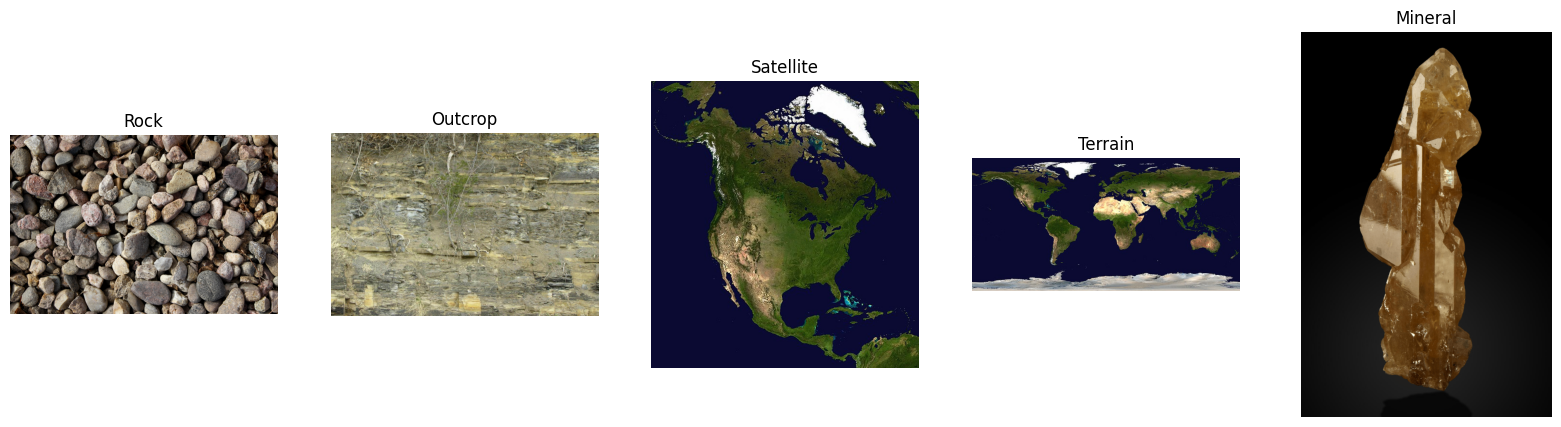

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import requests
from io import BytesIO

# GitHub Raw URLs
image_urls = {
    "Rock": "https://raw.githubusercontent.com/fangayou90/Final-Module/main/pebble-rock-gravel-texture.jpg",
    "Outcrop": "https://raw.githubusercontent.com/fangayou90/Final-Module/main/Fayetteville_shale_outcrop.jpg",
    "Satellite": "https://raw.githubusercontent.com/fangayou90/Final-Module/main/North_America_satellite_orthographic.jpg",
    "Terrain": "https://raw.githubusercontent.com/fangayou90/Final-Module/main/Whole_world_-_land_and_oceans.jpg",
    "Mineral": "https://raw.githubusercontent.com/fangayou90/Final-Module/main/cerussite_1.png"
}

images = {}

# Download and load images (Keep them in color)
for name, url in image_urls.items():
    try:
        response = requests.get(url, stream=True)
        response.raise_for_status()  # Ensure request was successful
        img = io.imread(BytesIO(response.content))  # Read image from response
        images[name] = img
        print(f"Loaded {name} image successfully")
    except Exception as e:
        print(f"Error loading {name} image: {e}")

# Display all images in color
fig, axes = plt.subplots(1, 5, figsize=(20, 5))
for ax, (name, img) in zip(axes, images.items()):
    ax.imshow(img)  # Keep original colors
    ax.set_title(name)
    ax.axis("off")

plt.show()

## **Example 1: Edge Detection Using the Sobel Filter**

This example demonstrates two important image processing techniques: edge detection using the Sobel filter and segmentation using the watershed algorithm.

The Sobel filter computes the gradient magnitude of the image, highlighting sharp intensity changes that often correspond to geological boundaries, fault lines, or rock formations. This helps in structural mapping and satellite imagery analysis.

The watershed algorithm is then applied to segment different regions within the image, making it useful for separating overlapping geological structures. By leveraging markers and gradients, this method effectively distinguishes different geological features.

Both techniques provide valuable insights into rock formations, terrain structures, and complex natural patterns in geoscience applications.



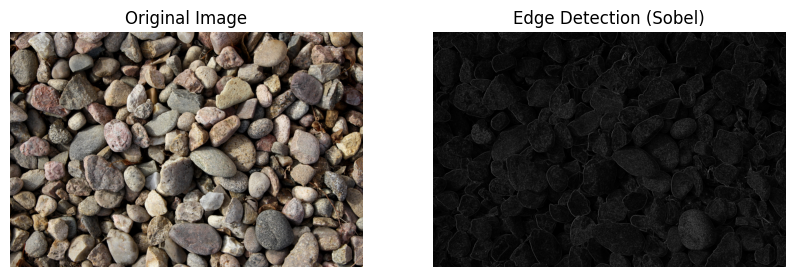

In [2]:
import matplotlib.pyplot as plt
from skimage import filters, color
from skimage.io import imread

# Load the image
image1 = imread("https://raw.githubusercontent.com/fangayou90/Final-Module/main/pebble-rock-gravel-texture.jpg")  # Replace with your actual image path
image1_gray = color.rgb2gray(image1)  # Convert to grayscale if needed

# Apply Sobel filter
edges = filters.sobel(image1_gray)

# Plot the original and edge-detected images
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(image1, cmap='gray')
plt.title('Original Image')
plt.axis('off')

plt.subplot(1,2,2)
plt.imshow(edges, cmap='gray')
plt.title('Edge Detection (Sobel)')
plt.axis('off')

plt.show()

## **Example 2: Image Segmentation Using the Watershed Algorithm**

This example demonstrates two fundamental image processing techniques: segmentation using the Watershed algorithm and edge detection using the Canny algorithm.

The Watershed algorithm segments a geoscience-related image by treating it as a topographic surface, where markers help define boundaries between different geological features. This technique is particularly useful for distinguishing rock layers, mineral deposits, and stratigraphic formations in geological surveys and remote sensing.

The Canny edge detection method is then applied to highlight sharp boundaries, such as fractures in rock formations. By adjusting threshold values, this technique enhances structural details, improving the identification of significant geological features.

Both methods are valuable tools for automating geological interpretations, increasing accuracy and efficiency in analyzing rock formations and terrain structures.



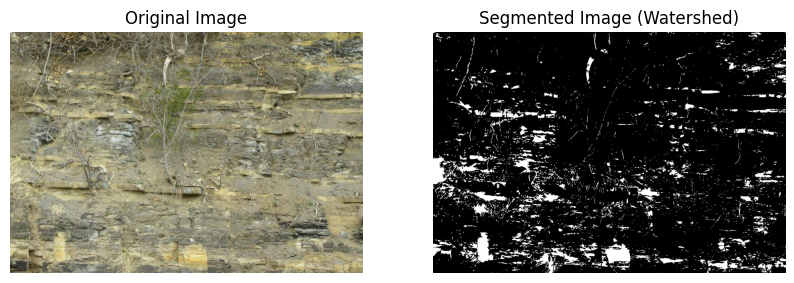

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io, color, segmentation
import requests
from io import BytesIO

# Load the image from GitHub (Ensure your internet connection is active)
image_url = "https://raw.githubusercontent.com/fangayou90/Final-Module/main/Fayetteville_shale_outcrop.jpg"

# Download and read image
response = requests.get(image_url, stream=True)
response.raise_for_status()  # Ensure request was successful
image2 = io.imread(BytesIO(response.content))  # Read image

# Convert to grayscale for segmentation (but keep original image for display)
image2_gray = color.rgb2gray(image2) if image2.ndim == 3 else image2

# Create markers for segmentation
markers = np.zeros_like(image2_gray, dtype=np.int32)
markers[image2_gray < 0.3] = 1
markers[image2_gray > 0.7] = 2

# Apply Watershed Segmentation
segmented = segmentation.watershed(image2_gray, markers)

# Plot the results
plt.figure(figsize=(10, 5))

# Display original color image
plt.subplot(1, 2, 1)
plt.imshow(image2)  # Keep original colors
plt.title('Original Image')
plt.axis("off")

# Display segmented image
plt.subplot(1, 2, 2)
plt.imshow(segmented, cmap='gray')
plt.title('Segmented Image (Watershed)')
plt.axis("off")

plt.show()

## **Example 3: Enhancing Image Contrast Using Histogram Equalization**

This example explores two key image processing techniques: Histogram Equalization for contrast enhancement and the Hough Transform for detecting linear features.

Histogram Equalization enhances contrast by redistributing pixel intensities, making subtle variations in geological images more visible. This technique is particularly useful in remote sensing, satellite imagery, and aerial photography, helping to highlight rock formations, terrain structures, and mineral distributions.

The Hough Transform is then applied to detect linear features in the image, which can be used to identify geological faults, fractures, and structural trends. Adjusting the transform parameters influences the accuracy of detected lines, making it a valuable tool for geological interpretation.

Together, these methods improve the visibility of critical geological features and enhance the accuracy of structural mapping in geoscience applications.



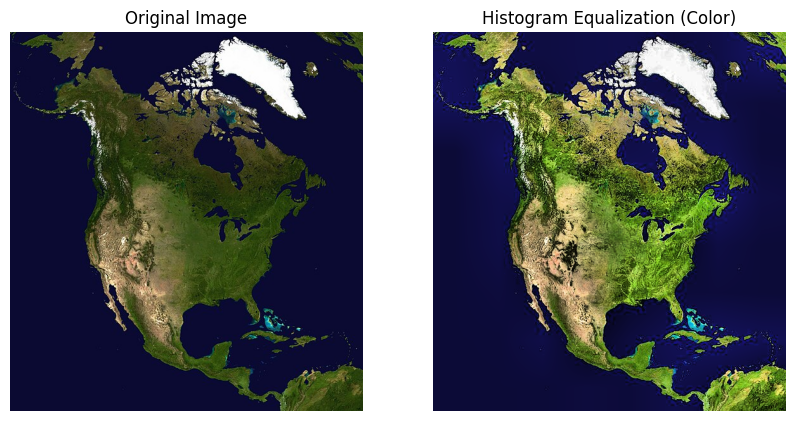

In [4]:
import matplotlib.pyplot as plt
from skimage import exposure, io
import requests
from io import BytesIO

# Load the image from GitHub
image_url = "https://raw.githubusercontent.com/fangayou90/Final-Module/main/North_America_satellite_orthographic.jpg"

# Download and read image
response = requests.get(image_url, stream=True)
response.raise_for_status()  # Ensure request was successful
image3 = io.imread(BytesIO(response.content))  # Read image

# Apply Adaptive Histogram Equalization for better contrast
image3_eq = exposure.equalize_adapthist(image3, clip_limit=0.03)  # Works for color images

# Plot the original and histogram-equalized images
plt.figure(figsize=(10, 5))

# Display original color image
plt.subplot(1, 2, 1)
plt.imshow(image3)
plt.title('Original Image')
plt.axis('off')

# Display histogram-equalized image
plt.subplot(1, 2, 2)
plt.imshow(image3_eq)
plt.title('Histogram Equalization (Color)')
plt.axis('off')

plt.show()

## **Example 4: Geometric Transformation (Swirl)**

This example explores two important image processing techniques: Swirl Transformation for geometric distortion and Thresholding for image segmentation.

The Swirl Transformation distorts the image by rotating pixels around a central point, demonstrating how geometric warping affects spatial structures. While primarily used for artistic or experimental purposes, similar transformations are valuable in geospatial analysis, topographic modeling, and correcting distortions in satellite imagery.

The Thresholding Segmentation technique is then applied to separate different regions in an image based on pixel intensity. This method is particularly useful for distinguishing rock layers in core sample images, helping to classify geological formations more effectively.

By combining these approaches, this example illustrates both the impact of geometric transformations on image structures and the practical applications of segmentation in geological analysis.



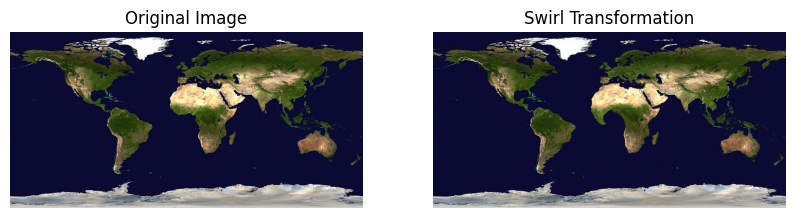

In [5]:
import matplotlib.pyplot as plt
from skimage import transform, io
import requests
from io import BytesIO

# Load the image from GitHub
image_url = "https://raw.githubusercontent.com/fangayou90/Final-Module/main/Whole_world_-_land_and_oceans.jpg"

# Download and read image
response = requests.get(image_url, stream=True)
response.raise_for_status()  # Ensure request was successful
image4 = io.imread(BytesIO(response.content))  # Read image

# Apply Swirl Transformation
swirled = transform.swirl(image4, strength=5, radius=100)

# Plot the original and transformed images
plt.figure(figsize=(10, 5))

# Display original color image
plt.subplot(1, 2, 1)
plt.imshow(image4)
plt.title('Original Image')
plt.axis('off')

# Display swirled image
plt.subplot(1, 2, 2)
plt.imshow(swirled)
plt.title('Swirl Transformation')
plt.axis('off')

plt.show()

## **Example 5: Thresholding (Otsu's Method)**

This example demonstrates two essential image processing techniques: Otsu’s Thresholding for binarization and the Sobel Filter for edge detection.

Otsu’s Thresholding automatically determines the optimal threshold to convert an image into a binary format, separating objects from the background. This technique is widely used in geological microscopy, mineral identification, and rock texture analysis, as it effectively distinguishes different materials without requiring manual adjustments.

The Sobel Filter is then applied to detect edges by enhancing gradient changes in different directions. This method is particularly useful for highlighting textures and structural details in geological samples, helping to identify fractures and rock boundaries even in noisy images.

Together, these techniques enhance the clarity of geological images, improving segmentation and feature detection for more accurate geoscience analysis.



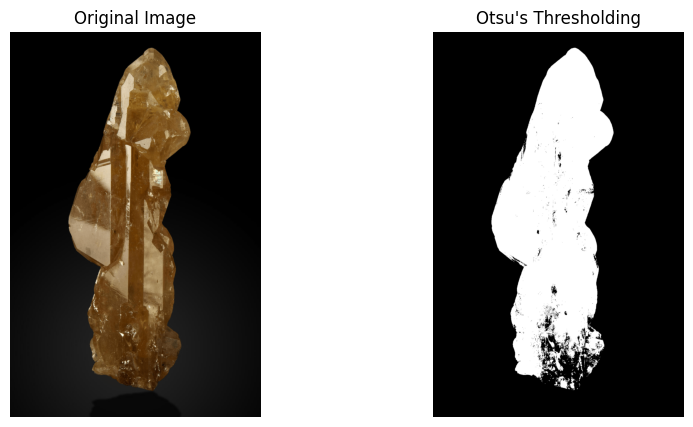

In [6]:
import matplotlib.pyplot as plt
from skimage import filters, io, color
import requests
from io import BytesIO

# Load the image from GitHub
image_url = "https://raw.githubusercontent.com/fangayou90/Final-Module/main/cerussite_1.png"

# Download and read image
response = requests.get(image_url, stream=True)
response.raise_for_status()  # Ensure request was successful
image5 = io.imread(BytesIO(response.content))  # Read image

# Convert to grayscale for thresholding (but keep original for display)
image5_gray = color.rgb2gray(image5) if image5.ndim == 3 else image5

# Apply Otsu's Thresholding
thresh = filters.threshold_otsu(image5_gray)
binary = image5_gray > thresh

# Plot the original and thresholded images
plt.figure(figsize=(10, 5))

# Display original color image
plt.subplot(1, 2, 1)
plt.imshow(image5)
plt.title('Original Image')
plt.axis('off')

# Display thresholded image
plt.subplot(1, 2, 2)
plt.imshow(binary, cmap='gray')
plt.title("Otsu's Thresholding")
plt.axis('off')

plt.show()


## **Reflection**

Through this project, I explored various image processing techniques using scikit-image. Among the different methods, I found Histogram Equalization to be the most useful for enhancing contrast in satellite and terrain images, as it significantly improves visibility. The Edge Detection (Sobel Filter) was also fascinating as it accurately highlighted geological features in outcrop and rock images, making it valuable for structural analysis.

The Watershed Segmentation technique was interesting but challenging to fine-tune. The marker selection was particularly tricky because minor changes in threshold values could drastically alter segmentation results. While it worked well on high-contrast images, it struggled with more complex textures.

In the future, I see myself using Histogram Equalization and Edge Detection for improving geological image analysis, particularly in remote sensing and rock classification. I might also explore Thresholding (Otsu's Method) for automated mineral identification.

One weird observation was how Swirl Transformation, though fun to implement, seemed impractical for real-world applications. It distorted images in a visually appealing way but had no significant use in geoscience applications.

Overall, this assignment deepened my understanding of image processing and its role in geoscience applications.
